In [17]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import lifelines
from sklearn.preprocessing import LabelEncoder

In [ ]:
#!! pip install lifelines

['Collecting lifelines',
 '  Downloading lifelines-0.28.0-py3-none-any.whl (349 kB)',
 '\x1b[?25l     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.0/349.2 kB\x1b \x1b?\x1b eta \x1b-:--:--\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━━━━━━━━━━\x1b\x1b╺\x1b\x1b━━━━━━━━━━━━━━━━━\x1b \x1b194.6/349.2 kB\x1b \x1b5.5 MB/s\x1b eta \x1b0:00:01\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b349.2/349.2 kB\x1b \x1b7.7 MB/s\x1b eta \x1b0:00:00\x1b',
 '\x1b[?25hRequirement already satisfied: numpy<2.0,>=1.14.0 in /usr/local/lib/python3.10/dist-packages (from lifelines) (1.25.2)',
 'Requirement already satisfied: scipy>=1.2.0 in /usr/local/lib/python3.10/dist-packages (from lifelines) (1.11.4)',
 'Requirement already satisfied: pandas>=1.2.0 in /usr/local/lib/python3.10/dist-packages (from lifelines) (2.0.3)',
 'Requirement already satisfied: matplotlib>=3.0 in /usr/local/lib/python3.10/dist-packages (from lifelines) (3.7.1)',
 'Requirement already satisfied: autograd>=1.

In [18]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv', sep=',')

In [19]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [21]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1470.0,NaN,NaN,NaN,36.92381,9.135373,18.0,30.0,36.0,43.0,60.0
Attrition,1470,2,No,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel,1470,3,Travel_Rarely,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1470.0,NaN,NaN,NaN,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1470.0,NaN,NaN,NaN,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,NaN,NaN,NaN,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,1470.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,1470.0,NaN,NaN,NaN,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0


 # Look at the categorical and numerical variables


In [22]:

summary_categorical = []
for column in df.columns:
  if df[column].dtype == object:
    summary_categorical.append(column)
    print(df[column].value_counts())
    print(f"----------------------------------")

summary_numerical = []
for column in df.columns:
  if df[column].dtype != object:
    print(f"{column} : Minimum: {min((df[column].unique()))}, Maximum: {max((df[column].unique()))} ")
    summary_numerical.append(column)
    print(f"----------------------------------")


Attrition
No     1233
Yes     237
Name: count, dtype: int64
----------------------------------
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
----------------------------------
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
----------------------------------
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
----------------------------------
Gender
Male      882
Female    588
Name: count, dtype: int64
----------------------------------
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
H

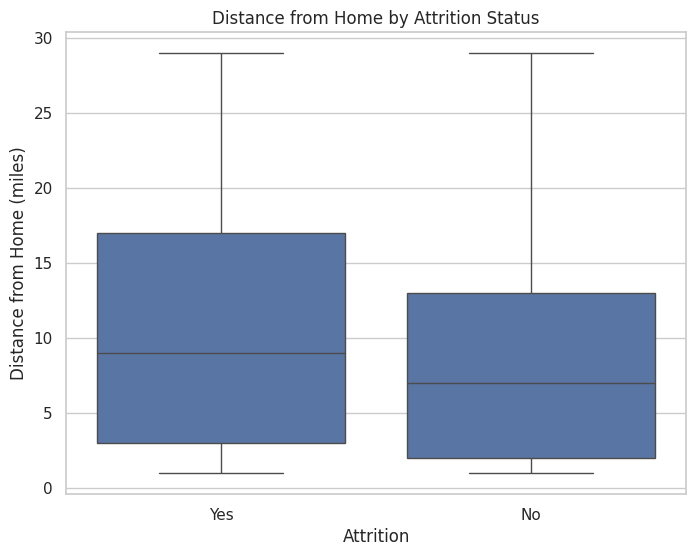

In [23]:
# Setting plot style
sns.set(style="whitegrid")

# Create a boxplot to compare distance from home for those who left vs those who stayed
plt.figure(figsize=(8, 6))
sns.boxplot(x='Attrition', y='DistanceFromHome', data=df)
plt.title('Distance from Home by Attrition Status')
plt.xlabel('Attrition')
plt.ylabel('Distance from Home (miles)')
plt.show()

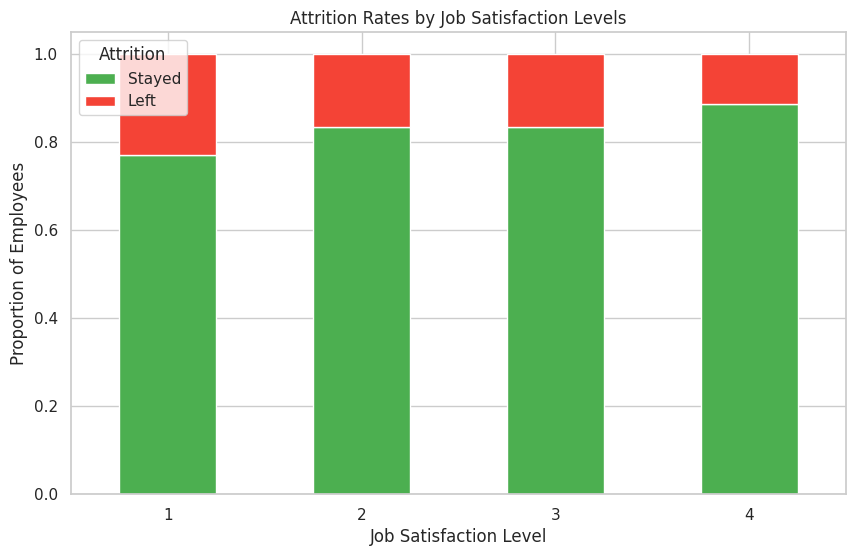

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting plot style
sns.set(style="whitegrid")

# Create a bar plot for attrition rates by job satisfaction levels
job_satisfaction_attrition = df.groupby('JobSatisfaction')['Attrition'].value_counts(normalize=True).unstack().fillna(0)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
job_satisfaction_attrition.plot(kind='bar', stacked=True, ax=ax, color=['#4CAF50', '#F44336'])
ax.set_xlabel('Job Satisfaction Level')
ax.set_ylabel('Proportion of Employees')
ax.set_title('Attrition Rates by Job Satisfaction Levels')
ax.legend(title='Attrition', labels=['Stayed', 'Left'])

plt.xticks(rotation=0)
plt.show()


# How does job role affect employee survival rates within the company?

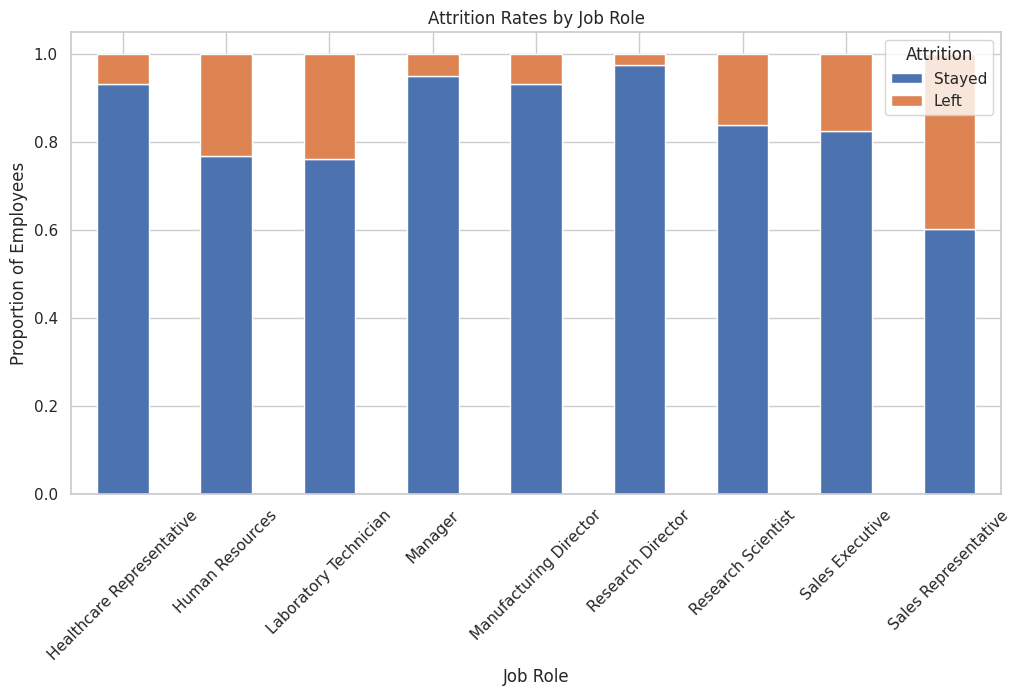

In [25]:
# Get the proportion of attrition by job role
job_role_attrition = df.groupby('JobRole')['Attrition'].value_counts(normalize=True).unstack().fillna(0)

# Plotting
job_role_attrition.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Attrition Rates by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Proportion of Employees')
plt.legend(title='Attrition', labels=['Stayed', 'Left'])
plt.xticks(rotation=45)
plt.show()


# How does the number of years at the company influence employee attrition?

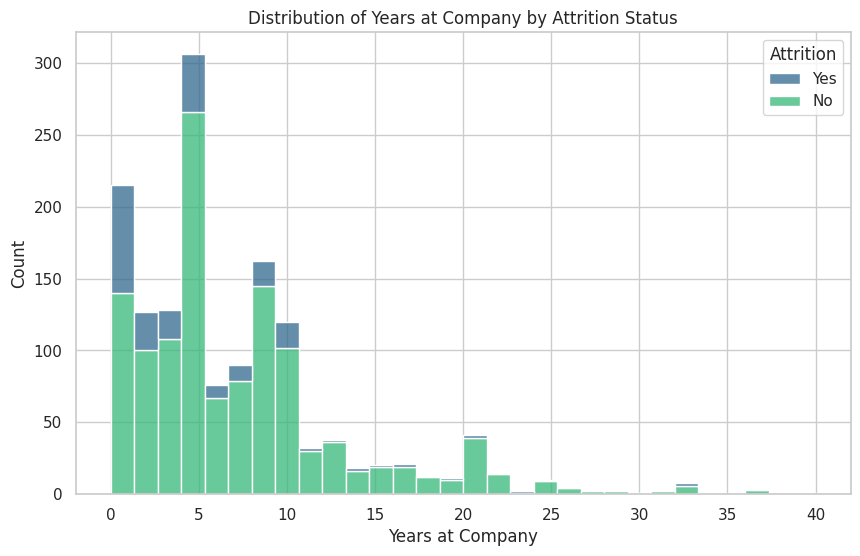

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting plot style
sns.set(style="whitegrid")

# Histogram for years at the company by attrition status
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='YearsAtCompany', hue='Attrition', multiple='stack', bins=30, palette='viridis')
plt.title('Distribution of Years at Company by Attrition Status')
plt.xlabel('Years at Company')
plt.ylabel('Count')
plt.show()


# Does monthly income impact the duration an employee stays with the company before leaving?

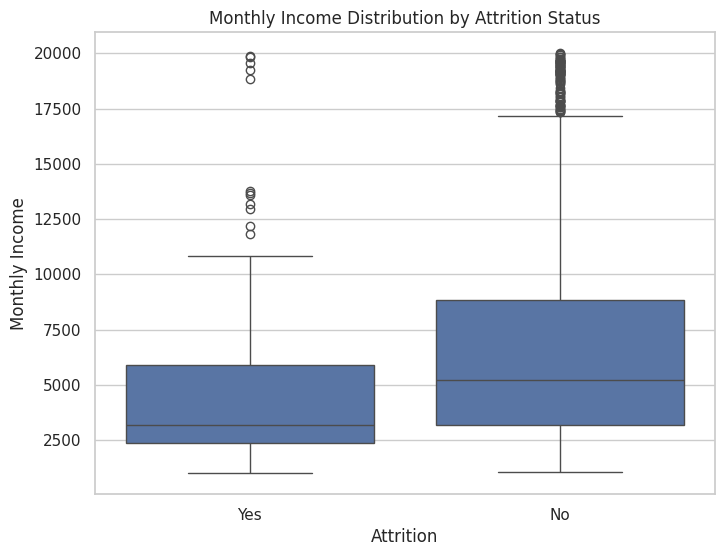

In [27]:
# Boxplot for monthly income by attrition status
plt.figure(figsize=(8, 6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Monthly Income Distribution by Attrition Status')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.show()


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import lifelines # for survival analysis
from sklearn.preprocessing import LabelEncoder

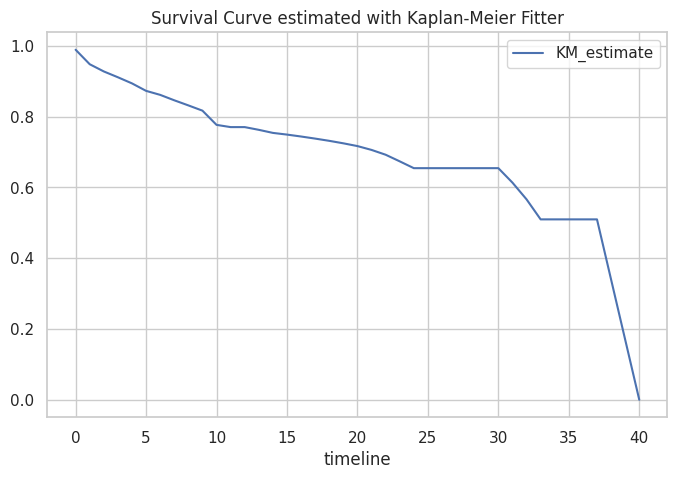

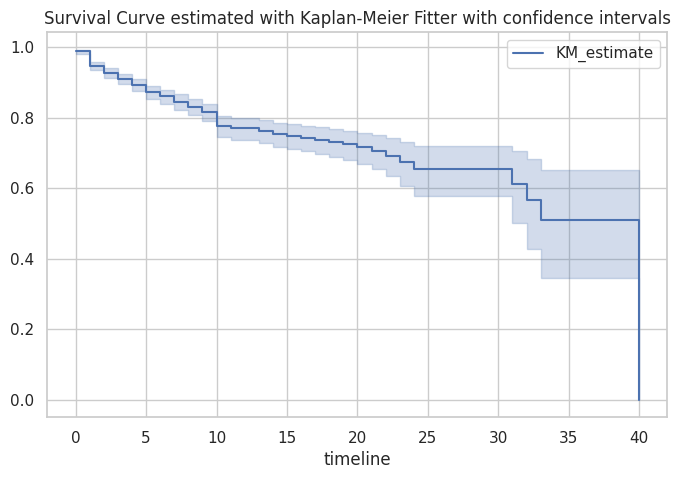

In [13]:
# Convert the Attrition into binary variable

encoder = LabelEncoder()
df['Attrition'] = encoder.fit_transform(df['Attrition'])
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()
kmf.fit(durations=df['YearsAtCompany'], event_observed=df['Attrition'])

kmf.survival_function_.plot(figsize=(8,5))
plt.title('Survival Curve estimated with Kaplan-Meier Fitter')
plt.show()

kmf.plot_survival_function(figsize=(8,5))
plt.title('Survival Curve estimated with Kaplan-Meier Fitter with confidence intervals')
plt.show()


In [37]:
kmf.survival_function_

,KM_estimate
timeline,
0.0,0.989116
1.0,0.948192
2.0,0.927792
3.0,0.911342
4.0,0.894026
5.0,0.872931
6.0,0.861611
7.0,0.846275
8.0,0.831850


Initial High Survival Probability: The survival curve starts high, indicating that most new hires tend to stay with the company initially. This can be interpreted as a period where employees are typically settling into their roles and less likely to leave.

Decline in Survival Probability: As time progresses, the survival probability decreases, which is a typical pattern in employee retention. This decline can be associated with various factors like career progression, satisfaction with the role, and external opportunities. It’s important to identify specific times when sharp declines occur, as these represent critical periods where intervention might be needed to improve retention.

Plateaus in the Curve: Any plateaus in the curve indicate periods where the attrition rate stabilizes. This could suggest that employees who stay beyond certain tenure milestones may be more likely to remain for longer periods subsequently. Identifying such milestones can help HR to tailor their strategies to ensure employees reach these points of relative stability.

Incorporating Confidence Intervals: The survival curve with confidence intervals provides a visual understanding of the uncertainty in the survival estimates, especially noticeable at longer tenures. A wider confidence interval at higher tenure values suggests fewer data points at these lengths of service, increasing uncertainty. This information is critical when making decisions based on less frequent outcomes, as it underscores the need for cautious interpretation and possibly more targeted data collection for long-tenured employees.

Practical HR Applications:
Early Tenure Interventions: Since the survival probability is high initially but starts to decline after a certain period, HR programs aimed at career development, mentorship, and engagement could be strategically introduced before this drop-off point to enhance retention.
Focus on Critical Tenure Milestones: By analyzing when the survival probability begins to plateau, HR can develop specific programs to help employees reach and exceed these tenure milestones, potentially increasing overall company retention.

# Survival Function of Different Groups based on the job involment

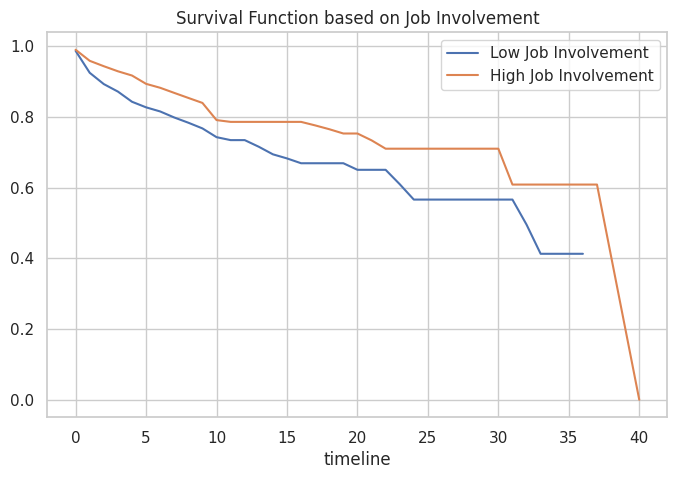

In [29]:
# Ensure data types are correct
df['YearsAtCompany'] = pd.to_numeric(df['YearsAtCompany'], errors='coerce')  # Convert to numeric, coercing errors
df = df.dropna(subset=['YearsAtCompany'])  # Drop any rows that couldn't be converted

# Use LabelEncoder to convert 'Attrition' into a binary variable
encoder = LabelEncoder()
df['Attrition'] = encoder.fit_transform(df['Attrition'].astype(str))  # Ensure Attrition is treated as string for encoding

# Define groups based on Job Involvement
LowInvolvement = df['JobInvolvement'].isin([1, 2])
HighInvolvement = df['JobInvolvement'].isin([3, 4])

# Initialize the Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Plot setup
plt.figure(figsize=(8, 5))
ax = plt.subplot()

# Fit data for Low Job Involvement group
kmf.fit(durations=df[LowInvolvement]['YearsAtCompany'],
        event_observed=df[LowInvolvement]['Attrition'],
        label='Low Job Involvement')
kmf.survival_function_.plot(ax=ax)

# Fit data for High Job Involvement group
kmf.fit(durations=df[HighInvolvement]['YearsAtCompany'],
        event_observed=df[HighInvolvement]['Attrition'],
        label='High Job Involvement')
kmf.survival_function_.plot(ax=ax)

# Add title and show plot
plt.title('Survival Function based on Job Involvement')
plt.show()

# Survival Function based on work life balance

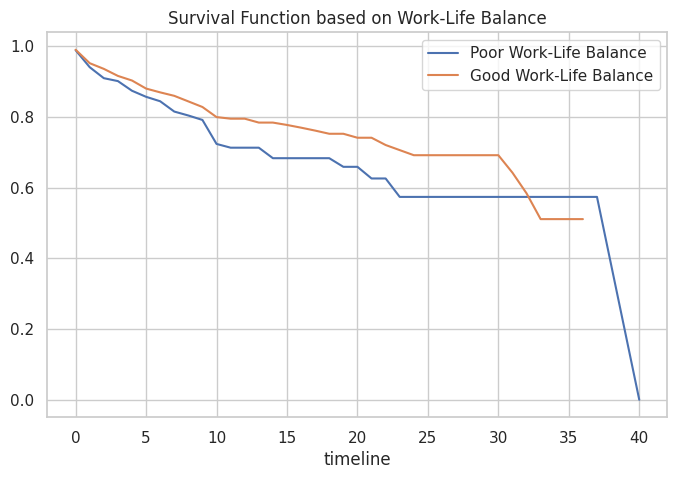

Survival probabilities for Poor Work-Life Balance at different years:
1     0.940120
3     0.900862
5     0.856434
10    0.723223
Name: Poor Work-Life Balance, dtype: float64

Survival probabilities for Good Work-Life Balance at different years:
1     0.951464
3     0.915518
5     0.879755
10    0.799098
Name: Good Work-Life Balance, dtype: float64


In [30]:
# Define groups based on WorkLifeBalance
PoorBalance = df['WorkLifeBalance'].isin([1, 2])
GoodBalance = df['WorkLifeBalance'].isin([3, 4])

# Initialize the Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Setup plot
plt.figure(figsize=(8, 5))
ax = plt.subplot()

# Fit and plot data for Poor Work-Life Balance group
kmf.fit(durations=df[PoorBalance]['YearsAtCompany'],
        event_observed=df[PoorBalance]['Attrition'],
        label='Poor Work-Life Balance')
kmf.survival_function_.plot(ax=ax)
summary_poor = kmf.survival_function_at_times([1, 3, 5, 10])  # Summary at specific years

# Fit and plot data for Good Work-Life Balance group
kmf.fit(durations=df[GoodBalance]['YearsAtCompany'],
        event_observed=df[GoodBalance]['Attrition'],
        label='Good Work-Life Balance')
kmf.survival_function_.plot(ax=ax)
summary_good = kmf.survival_function_at_times([1, 3, 5, 10])  # Summary at specific years

# Finalize plot
plt.title('Survival Function based on Work-Life Balance')
plt.show()

# Print summaries
print("Survival probabilities for Poor Work-Life Balance at different years:")
print(summary_poor)
print("\nSurvival probabilities for Good Work-Life Balance at different years:")
print(summary_good)

# Survival Function based on martial status

Survival probabilities for Single at different years:
1     0.904361
3     0.858123
5     0.786051
10    0.650733
Name: Single, dtype: float64


Survival probabilities for Married at different years:
1     0.965353
3     0.938070
5     0.916410
10    0.823891
Name: Married, dtype: float64


Survival probabilities for Divorced at different years:
1     0.975232
3     0.932069
5     0.907767
10    0.865652
Name: Divorced, dtype: float64




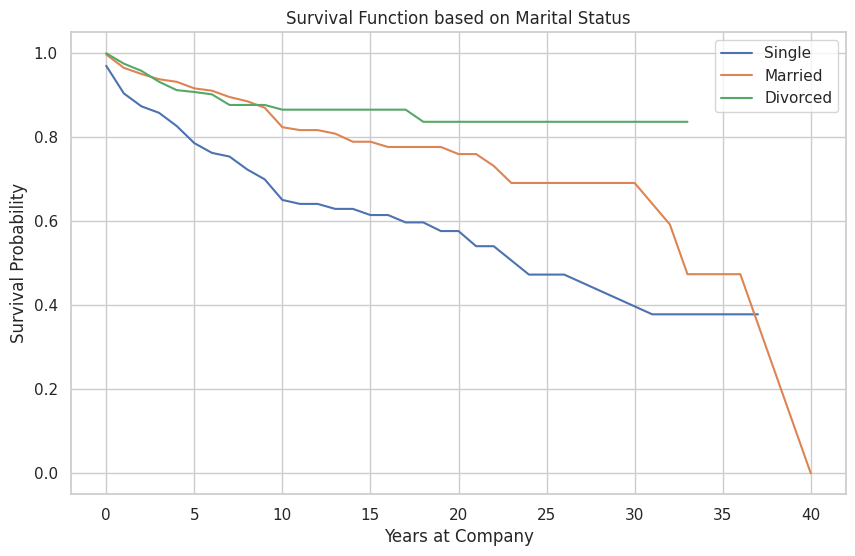

In [31]:
# Initialize the Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Setup plot
plt.figure(figsize=(10, 6))
ax = plt.subplot()

# Define groups and fit data for each Marital Status
for status in ['Single', 'Married', 'Divorced']:
    mask = df['MaritalStatus'] == status
    kmf.fit(durations=df[mask]['YearsAtCompany'],
            event_observed=df[mask]['Attrition'],
            label=status)
    kmf.survival_function_.plot(ax=ax)
    summary = kmf.survival_function_at_times([1, 3, 5, 10])  # Summary at specific years
    print(f"Survival probabilities for {status} at different years:")
    print(summary)
    print("\n")

# Finalize plot
plt.title('Survival Function based on Marital Status')
plt.xlabel('Years at Company')
plt.ylabel('Survival Probability')
plt.show()

# Kaplan Mier analysis based on the BusinessTravel

Survival probabilities for Travel_Rarely at different years:
1     0.955252
3     0.919607
5     0.882384
10    0.790766
Name: Travel_Rarely, dtype: float64


Survival probabilities for Travel_Frequently at different years:
1     0.912435
3     0.860740
5     0.813851
10    0.681690
Name: Travel_Frequently, dtype: float64


Survival probabilities for Non-Travel at different years:
1     0.965548
3     0.949774
5     0.920542
10    0.872092
Name: Non-Travel, dtype: float64




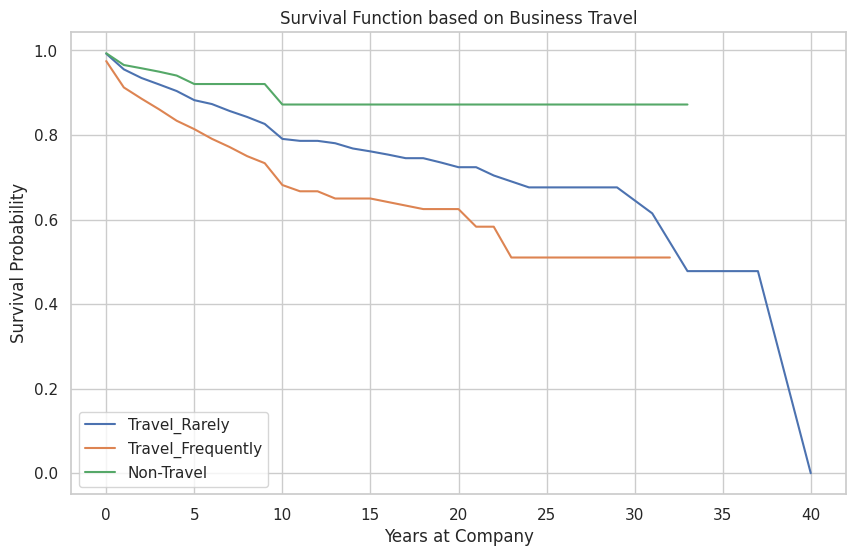

In [32]:
# Initialize the Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Setup plot
plt.figure(figsize=(10, 6))
ax = plt.subplot()

# Define groups and fit data for each Business Travel category
for category in df['BusinessTravel'].unique():
    mask = df['BusinessTravel'] == category
    kmf.fit(durations=df[mask]['YearsAtCompany'],
            event_observed=df[mask]['Attrition'],
            label=category)
    kmf.survival_function_.plot(ax=ax)
    summary = kmf.survival_function_at_times([1, 3, 5, 10])  # Summary at specific years
    print(f"Survival probabilities for {category} at different years:")
    print(summary)
    print("\n")

# Finalize plot
plt.title('Survival Function based on Business Travel')
plt.xlabel('Years at Company')
plt.ylabel('Survival Probability')
plt.show()


# Log-Rank Test for Job Involvement (Low vs High)

In [33]:
from lifelines.statistics import logrank_test

# Define groups based on Job Involvement
LowInvolvement = df['JobInvolvement'].isin([1, 2])
HighInvolvement = df['JobInvolvement'].isin([3, 4])

# Perform log-rank test
job_involvement_output = logrank_test(
    durations_A = df[LowInvolvement]['YearsAtCompany'],
    durations_B = df[HighInvolvement]['YearsAtCompany'],
    event_observed_A = df[LowInvolvement]['Attrition'],
    event_observed_B = df[HighInvolvement]['Attrition']
)
job_involvement_output

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          11.45 <0.005     10.45

#  Log-Rank Test for Marital Status (Single vs Married)

In [34]:
# Define groups based on Marital Status
Single = df['MaritalStatus'] == 'Single'
Married = df['MaritalStatus'] == 'Married'

# Perform log-rank test
marital_status_output = logrank_test(
    durations_A = df[Single]['YearsAtCompany'],
    durations_B = df[Married]['YearsAtCompany'],
    event_observed_A = df[Single]['Attrition'],
    event_observed_B = df[Married]['Attrition']
)
marital_status_output

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          38.08 <0.005     30.45

#  Log-Rank Test for Business Travel (Travel Rarely vs Travel Frequently)

In [35]:
# Define groups based on Business Travel
TravelRarely = df['BusinessTravel'] == 'Travel_Rarely'
TravelFrequently = df['BusinessTravel'] == 'Travel_Frequently'

# Perform log-rank test
business_travel_output = logrank_test(
    durations_A = df[TravelRarely]['YearsAtCompany'],
    durations_B = df[TravelFrequently]['YearsAtCompany'],
    event_observed_A = df[TravelRarely]['Attrition'],
    event_observed_B = df[TravelFrequently]['Attrition']
)
business_travel_output


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          12.48 <0.005     11.25

#  Cox Proportional Hazards Model focusing on Job-Related Factors

In [36]:
columns_job_related = ['Attrition', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
                       'PercentSalaryHike', 'YearsAtCompany']

# Filter the dataframe for the selected columns
df_job_related = df[columns_job_related]

from lifelines import CoxPHFitter

# Initialize and fit the Cox Proportional Hazards model
coxph_job = CoxPHFitter()
coxph_job.fit(df_job_related, duration_col='YearsAtCompany', event_col='Attrition')

<lifelines.CoxPHFitter: fitted with 1470 total observations, 1233 right-censored observations>

In [37]:
# Print the summary of the model
coxph_job.print_summary()

<lifelines.CoxPHFitter: fitted with 1470 total observations, 1233 right-censored observations>
             duration col = 'YearsAtCompany'
                event col = 'Attrition'
      baseline estimation = breslow
   number of observations = 1470
number of events observed = 237
   partial log-likelihood = -1475.16
         time fit was run = 2024-04-23 05:35:13 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                 
JobInvolvement     -0.44       0.64       0.08            -0.61            -0.28                 0.54                 0.76
JobLevel           -1.01       0.36       0.09            -1.20            -0.83                 0.30                 0.44
JobSatisfaction    -0.22       0.80       0.06            -0.34            -0.11                 0.72                 0.90
PercentSalaryHike  -0.01       0.99       0.02            -0.04             0.03                 0.96                 1.03

                    cmp to      z      p   -log2(p)
covariate                                          
JobInvolvement        0.00  -5.24 <0.005      22.55
JobLevel              0.00 -10.82 <0.005      88.17
JobSatisfaction       0.00  -3.88 <0.005      13.20
PercentSalaryHike     0.00  -0.35   0.73       0.46
---
Concordance = 0.77
Partial AIC = 2958.33
log-likelihood ratio test = 197.92 on 4 df
-log2(p) of ll-ratio test = 136.13

<Axes: xlabel='log(HR) (95% CI)'>

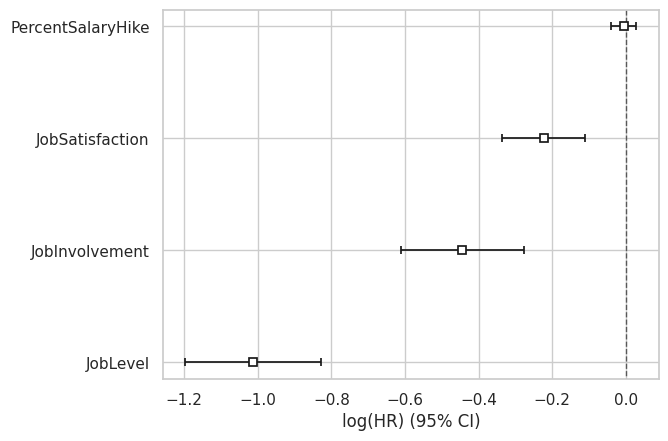

In [38]:
# Plot the coefficients of the model
coxph_job.plot()


In [39]:
# Check model assumptions
coxph_job.check_assumptions(df_job_related)


Proportional hazard assumption looks okay.


[]

In [40]:
# Predict survival function for the current employees
df_job_current = df_job_related.loc[df_job_related['Attrition'] == 0]
predictions_job = coxph_job.predict_survival_function(df_job_current,
                                                      conditional_after=df_job_current['YearsAtCompany'])
print(predictions_job.head(11).iloc[:, :5])

             1         3         4         5         6
0.0   1.000000  1.000000  1.000000  1.000000  1.000000
1.0   0.980181  0.950718  0.962880  0.964856  0.967281
2.0   0.980181  0.819856  0.922440  0.927064  0.939751
3.0   0.952874  0.795281  0.871648  0.824633  0.909472
4.0   0.919917  0.795281  0.840849  0.805028  0.870991
5.0   0.901198  0.761841  0.797489  0.805028  0.847400
6.0   0.876386  0.722142  0.753905  0.778146  0.813836
7.0   0.848778  0.699920  0.708040  0.745908  0.779662
8.0   0.816784  0.670833  0.589088  0.727701  0.743188
9.0   0.772965  0.638968  0.567237  0.703685  0.645843
10.0  0.722742  0.602711  0.567237  0.677124  0.627475


#  Cox Proportional Hazards Model focusing on Personal Attributes and Company Benefits

In [41]:
# Prepare the dataframe for fitting personal attributes and company benefits
columns_personal_benefits = ['Attrition', 'EnvironmentSatisfaction', 'RelationshipSatisfaction',
                             'StockOptionLevel', 'TrainingTimesLastYear', 'YearsAtCompany']

# Filter the dataframe for the selected columns
df_personal_benefits = df[columns_personal_benefits]

# Initialize and fit the Cox Proportional Hazards model
coxph_personal = CoxPHFitter()
coxph_personal.fit(df_personal_benefits, duration_col='YearsAtCompany', event_col='Attrition')

# Print the summary of the model
coxph_personal.print_summary()

<lifelines.CoxPHFitter: fitted with 1470 total observations, 1233 right-censored observations>
             duration col = 'YearsAtCompany'
                event col = 'Attrition'
      baseline estimation = breslow
   number of observations = 1470
number of events observed = 237
   partial log-likelihood = -1547.26
         time fit was run = 2024-04-23 05:36:43 UTC

---
                           coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                        
EnvironmentSatisfaction   -0.22       0.80       0.06            -0.34            -0.11                 0.72                 0.90
RelationshipSatisfaction  -0.12       0.89       0.06            -0.23            -0.00                 0.79                 1.00
StockOptionLevel          -0.50       0.61       0.10            -0.69            -0.31                 0.50                 0.73
TrainingTimesLastYear     -0.11       0.90       0.05            -0.21            -0.00                 0.81                 1.00

                           cmp to     z      p   -log2(p)
covariate                                                
EnvironmentSatisfaction      0.00 -3.76 <0.005      12.52
RelationshipSatisfaction     0.00 -1.99   0.05       4.43
StockOptionLevel             0.00 -5.17 <0.005      22.06
TrainingTimesLastYear        0.00 -2.00   0.05       4.45
---
Concordance = 0.64
Partial AIC = 3102.53
log-likelihood ratio test = 53.72 on 4 df
-log2(p) of ll-ratio test = 33.95

<Axes: xlabel='log(HR) (95% CI)'>

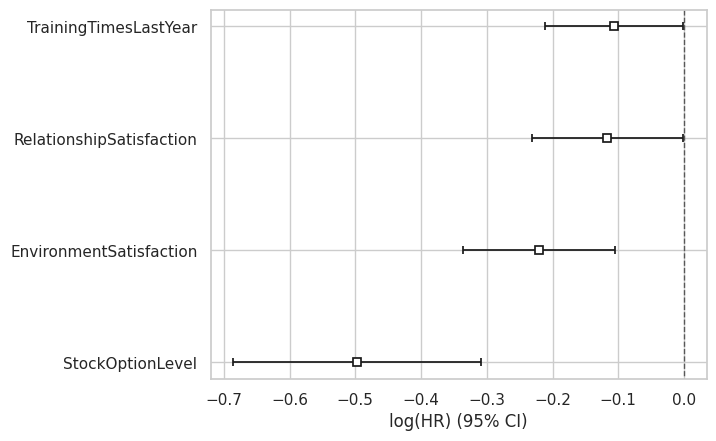

In [42]:
coxph_personal.plot()


In [43]:
coxph_personal.check_assumptions(df_personal_benefits)


Proportional hazard assumption looks okay.


[]

In [44]:
df_personal_current = df_personal_benefits.loc[df_personal_benefits['Attrition'] == 0]
predictions_personal = coxph_personal.predict_survival_function(df_personal_current,
                                                                conditional_after=df_personal_current['YearsAtCompany'])
print(predictions_personal.head(11).iloc[:, :5])

             1         3         4         5         6
0.0   1.000000  1.000000  1.000000  1.000000  1.000000
1.0   0.994835  0.982927  0.982513  0.982118  0.992850
2.0   0.994835  0.938102  0.964007  0.963482  0.986958
3.0   0.988545  0.930931  0.941455  0.914728  0.980646
4.0   0.981492  0.930931  0.929259  0.906952  0.972845
5.0   0.977623  0.922221  0.912727  0.906952  0.968575
6.0   0.973175  0.912487  0.897334  0.897518  0.962726
7.0   0.968317  0.907162  0.881274  0.886985  0.957217
8.0   0.963093  0.901052  0.839174  0.881229  0.951402
9.0   0.957355  0.894395  0.832448  0.874628  0.935818
10.0  0.950961  0.887253  0.832448  0.867442  0.933280


#  Including Interaction Effects in Cox Models

In [45]:
# Create an interaction term
df['JobInteraction'] = df['JobInvolvement'] * df['JobSatisfaction']

# Prepare data with the interaction term
columns = ['Attrition', 'JobInvolvement', 'JobSatisfaction', 'JobInteraction', 'YearsAtCompany']

# Filter the dataframe for the selected columns
df_interaction = df[columns]

# Initialize and fit the Cox Proportional Hazards model
coxph_interaction = CoxPHFitter()
coxph_interaction.fit(df_interaction, duration_col='YearsAtCompany', event_col='Attrition')

# Print the summary of the model
coxph_interaction.print_summary()

<lifelines.CoxPHFitter: fitted with 1470 total observations, 1233 right-censored observations>
             duration col = 'YearsAtCompany'
                event col = 'Attrition'
      baseline estimation = breslow
   number of observations = 1470
number of events observed = 237
   partial log-likelihood = -1556.54
         time fit was run = 2024-04-23 05:39:15 UTC

---
                  coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                               
JobInvolvement   -0.38       0.69       0.21            -0.78             0.03                 0.46                 1.03
JobSatisfaction  -0.20       0.82       0.20            -0.59             0.19                 0.55                 1.21
JobInteraction   -0.01       0.99       0.08            -0.16             0.14                 0.85                 1.15

                  cmp to     z    p   -log2(p)
covariate                                     
JobInvolvement      0.00 -1.81 0.07       3.84
JobSatisfaction     0.00 -1.02 0.31       1.69
JobInteraction      0.00 -0.15 0.88       0.18
---
Concordance = 0.62
Partial AIC = 3119.07
log-likelihood ratio test = 35.17 on 3 df
-log2(p) of ll-ratio test = 23.09

In [46]:
coxph_interaction.check_assumptions(df_interaction)

Proportional hazard assumption looks okay.


[]

<Axes: xlabel='log(HR) (95% CI)'>

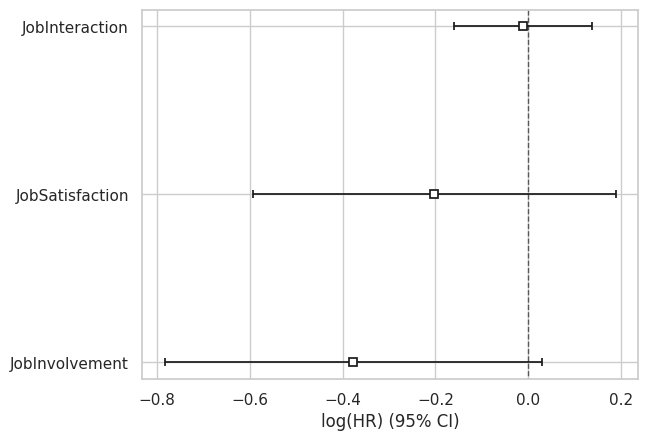

In [47]:
coxph_interaction.plot()